## Connect to Drive Account

In [1]:
try:
  from google.colab import drive
  drive.mount('/content/drive')
except:
    print("You are not working in Colab at the moment :(")

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/Sentiment Analysis/Data'

/content/drive/.shortcut-targets-by-id/1WcN1Xj_6ZlvgCWQvR35DZ3Vc8GoeGpYU/Sentiment Analysis/Data


## Import Libraries

In [3]:
import numpy as np
import pandas as pd 
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import wordcloud

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

import os

## Getting Data

In [4]:
df1 = pd.read_csv("train.csv")
df2 = pd.read_csv("test.csv")
df3 = pd.read_csv("datawithoutstopwordswithlemmas.csv")
sentiSet = pd.concat([df1, df2])
sentiSet.drop_duplicates(inplace=True)
sentiSet.isna().sum()

text       0
label      0
dataset    0
dtype: int64

In [5]:
%cd '/content/drive/MyDrive/Sentiment Analysis/With New Method'

/content/drive/.shortcut-targets-by-id/1WcN1Xj_6ZlvgCWQvR35DZ3Vc8GoeGpYU/Sentiment Analysis/With New Method


In [6]:
df_companies = pd.read_csv("process_twitter_data.csv")
df_companies.head()

,Unnamed: 0,Date,UserName,tweets,label,strip_spaces,find_lemmas
0,1,2021-10-15,50DolarJourney,@HBAysenur Gerçekten benimde gördüğüm ekranı o...,Positive,hbaysenur gerçekten benimde gördüğüm ekranı ok...,UNK gerçekten ben gör ekran oku ben bilgi ver ...
1,2,2021-05-14,LentePeynir,Lente İsli Çerkez Cevizli Peynirini tek tıkla ...,Positive,lente isli çerkez cevizli peynirini tek tıkla ...,UNK is çerkez ceviz peynir tek tıkla sipariş v...
2,3,2022-10-24,kampanyaradar,Alışveriş Kampanyaları✨\n\nKampanya detayların...,Positive,alışveriş kampanyaları kampanya detaylarını öğ...,alışveriş kampanya kampanya detay öğren kampan...
3,4,2022-11-06,CihazTV,Şu anki piyasada en uygun fiyatla Hepsiburada'...,Positive,anki piyasada uygun fiyatla hepsiburadada satı...,an piyasa uygun fiyat hepsiburada sat laptop l...
4,5,2021-11-23,LokaSLGNC,#hepsiburada 20 dk aynı reklamı izletince çok ...,Positive,hepsiburada aynı reklamı izletince sevileceğin...,hepsiburada aynı reklam izle sev düşün herhald...


In [7]:
text_data = pd.concat([df3["find_lemmas"], df_companies["find_lemmas"]])
label_data = pd.concat([sentiSet["label"], df_companies["label"]])
text_data = text_data[394869:].copy()
label_data = label_data[394869:].copy()

In [8]:
label_data.value_counts()

Positive    264122
Notr        173003
Negative     57744
Name: label, dtype: int64

In [11]:
text_data

394869    ur tam UNK harici UNK UNK var UNK kalite sekil...
394870                             pek tasavvuf metin çevir
394871    film UNK gün önce izle izle sebep sıkkın geçen...
394872    ağırlık kilo ol rame biraz büyük gel ben ancak...
394873                                  UNK basit pişman al
                                ...                        
5752      iş falan filan defacto like like UNK UNK falan...
5753      defacto kabin bul telefon personel teslim et a...
5754                        orta çık iş sergile UNK defacto
5755      yıl başarı reklam thy tat pınar süt berbat rek...
5756      defacto reklam oyna kısa çirkin biri UNK hobbi...
Name: find_lemmas, Length: 100000, dtype: object

In [ ]:
label_data

0       Positive
1       Positive
2       Positive
3           Notr
4       Positive
          ...   
5752    Negative
5753    Negative
5754    Negative
5755    Negative
5756    Negative
Name: label, Length: 494869, dtype: object

## Data Companies

In [ ]:
hb_set = pd.read_excel("labelled_hb_data.xlsx")
ty_set = pd.read_csv("labelled_ty_data.csv")
thy_set = pd.read_csv("labelled_data_thy.csv")
lcw_set = pd.read_csv("labelled_lcw_data.csv")
df_set = pd.read_csv("labelled_df_data.csv")

In [ ]:
df = pd.concat([hb_set, ty_set, thy_set, lcw_set, df_set])

In [ ]:
hb_pos = hb_set[hb_set["label"] == "Positive"]
hb_neg = hb_set[hb_set["label"] == "Negative"]
hb_not = hb_set[hb_set["label"] == "Notr"]

pos_hb = hb_pos.sample(n = len(hb_neg) + 100, random_state = 44)
not_hb = hb_not.sample(n = len(hb_neg) + 200, random_state = 44)

hb_set = pd.concat([pos_hb, not_hb, hb_neg])

ty_pos = ty_set[ty_set["label"] == "Positive"]
ty_neg = ty_set[ty_set["label"] == "Negative"]
ty_not = ty_set[ty_set["label"] == "Notr"]

pos_ty = ty_pos.sample(n = len(ty_neg) + 200, random_state = 44)
not_ty = ty_not.sample(n = len(ty_neg) + 150, random_state = 44)

ty_set = pd.concat([pos_ty, not_ty, ty_neg])

thy_pos = thy_set[thy_set["label"] == "Positive"]
thy_neg = thy_set[thy_set["label"] == "Negative"]
thy_not = thy_set[thy_set["label"] == "Notr"]

pos_thy = thy_pos.sample(n = len(thy_neg) + 300, random_state = 44)
not_thy = thy_not.sample(n = len(thy_neg) + 150, random_state = 44)

thy_set = pd.concat([pos_thy, not_thy, thy_neg])

lcw_pos = lcw_set[lcw_set["label"] == "Positive"]
lcw_neg = lcw_set[lcw_set["label"] == "Negative"]
lcw_not = lcw_set[lcw_set["label"] == "Notr"]

pos_lcw = lcw_pos.sample(n = len(lcw_neg) + 200, random_state = 44)
not_lcw = lcw_not.sample(n = len(lcw_neg) + 100, random_state = 44)

lcw_set = pd.concat([pos_lcw, not_lcw, lcw_neg])

df_pos = df_set[df_set["label"] == "Positive"]
df_neg = df_set[df_set["label"] == "Negative"]
df_not = df_set[df_set["label"] == "Notr"]

pos_df = df_pos.sample(n = len(df_neg) + 100, random_state = 44)
not_df = df_not.sample(n = len(df_neg) + 100, random_state = 44)

df_set = pd.concat([pos_df, not_df, df_neg])

In [ ]:
df = pd.concat([hb_set, ty_set, thy_set, lcw_set, df_set])

In [ ]:
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Date,UserName,tweets,find_lemmas,label,processed_data
3253,3254.0,3254.0,3256,2022-03-21,YildizKalas,ŞIKAYETÇIYIM !!! \n\nİlk kez Türkiye'de #hepsi...,UNK ilk türkiye hepsiburada ürün sipariş et he...,Positive,NaN
5021,5022.0,5022.0,5029,2021-10-15,50DolarJourney,@HBAysenur Gerçekten benimde gördüğüm ekranı o...,UNK gerçekten ben gör ekran oku ben bilgi ver ...,Positive,NaN
6334,6335.0,6335.0,6343,2021-05-14,LentePeynir,Lente İsli Çerkez Cevizli Peynirini tek tıkla ...,UNK is çerkez ceviz peynir tek tıkla sipariş v...,Positive,NaN
1756,1757.0,1757.0,1758,2022-10-24,kampanyaradar,Alışveriş Kampanyaları✨\n\nKampanya detayların...,alışveriş kampanya kampanya detay öğren kampan...,Positive,NaN
1582,1583.0,1583.0,1584,2022-11-06,CihazTV,Şu anki piyasada en uygun fiyatla Hepsiburada'...,an piyasa uygun fiyat hepsiburada sat laptop l...,Positive,NaN


In [ ]:
df.drop(["Unnamed: 0.2", "Unnamed: 0.1", "Unnamed: 0", "find_lemmas", "processed_data"], axis=1, inplace=True)

In [ ]:
df.head()

,Date,UserName,tweets,label
3253,2022-03-21,YildizKalas,ŞIKAYETÇIYIM !!! \n\nİlk kez Türkiye'de #hepsi...,Positive
5021,2021-10-15,50DolarJourney,@HBAysenur Gerçekten benimde gördüğüm ekranı o...,Positive
6334,2021-05-14,LentePeynir,Lente İsli Çerkez Cevizli Peynirini tek tıkla ...,Positive
1756,2022-10-24,kampanyaradar,Alışveriş Kampanyaları✨\n\nKampanya detayların...,Positive
1582,2022-11-06,CihazTV,Şu anki piyasada en uygun fiyatla Hepsiburada'...,Positive


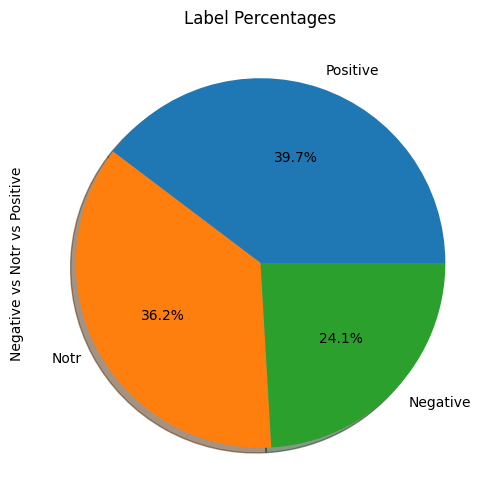

In [ ]:
df["label"].value_counts().plot(kind = 'pie', figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Negative vs Notr vs Positive")
plt.title("Label Percentages")
# plt.legend(["Negative", "Notr", "Positive"])
plt.show()

In [ ]:
df.to_csv("twitter_data_companies.csv")

In [ ]:
len(df)

5758

#Machine Learning 

##Transform with BoW Method

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer()
bow = bow_vectorizer.fit_transform(text_data.values.astype('U'))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
tfidf = tfidf_vectorizer.fit_transform(text_data.values.astype('U'))

tfidf.shape

(100000, 10000)

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(tfidf, label_data, test_size=0.2, random_state=42)

## Lojistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=123, max_iter=300).fit(xtrain, ytrain)

pred = lr.predict(xtest)
print(classification_report(ytest, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(ytest, pred))
print("Accuracy: \n", accuracy_score(ytest, pred))


              precision    recall  f1-score   support

    Negative       0.52      0.38      0.44       270
        Notr       0.51      0.56      0.53       413
    Positive       0.57      0.62      0.59       469

    accuracy                           0.54      1152
   macro avg       0.53      0.52      0.52      1152
weighted avg       0.54      0.54      0.54      1152


Confusion Matrix: 
 [[102  93  75]
 [ 44 230 139]
 [ 52 128 289]]
Accuracy: 
 0.5390625


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=123, max_iter=300).fit(xtrain, ytrain)

pred = lr.predict(xtest)
print(classification_report(ytest, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(ytest, pred))
print("Accuracy: \n", accuracy_score(ytest, pred))

              precision    recall  f1-score   support

    Negative       0.84      0.57      0.68      2343
        Notr       0.93      0.97      0.95      6939
    Positive       0.90      0.94      0.92     10718

    accuracy                           0.91     20000
   macro avg       0.89      0.83      0.85     20000
weighted avg       0.91      0.91      0.90     20000


Confusion Matrix: 
 [[ 1328   114   901]
 [   25  6744   170]
 [  236   371 10111]]
Accuracy: 
 0.90915


##SVM

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pickle
clf = make_pipeline(StandardScaler(with_mean=False), SVC(gamma='auto'))
clf.fit(xtrain, ytrain)

pred = clf.predict(xtest)
print(classification_report(ytest, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(ytest, pred))
print("Accuracy: \n", accuracy_score(ytest, pred))

              precision    recall  f1-score   support

    Negative       0.60      0.32      0.42       270
        Notr       0.54      0.55      0.54       413
    Positive       0.54      0.67      0.59       469

    accuracy                           0.54      1152
   macro avg       0.56      0.51      0.52      1152
weighted avg       0.55      0.54      0.53      1152


Confusion Matrix: 
 [[ 86  76 108]
 [ 21 228 164]
 [ 36 120 313]]
Accuracy: 
 0.5442708333333334


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pickle
clf = make_pipeline(StandardScaler(with_mean=False), SVC(gamma='auto'))
clf.fit(xtrain, ytrain)

pred = clf.predict(xtest)
print(classification_report(ytest, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(ytest, pred))
print("Accuracy: \n", accuracy_score(ytest, pred))

# Deep Learning Models

## LSTM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.utils.data_utils import pad_sequences

# df = pd.read_csv("process_twitter_data.csv")

# Stop-words'leri yükleyin
stop_words = set(stopwords.words('turkish'))

# Her metni tokenize edin ve stop-words'leri çıkarın
tokenized_texts = []
for text in text_data.values.astype('U'):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token not in stop_words]
    tokenized_texts.append(filtered_tokens)

# Sözlük oluşturun ve her kelimeyi indekse dönüştürün
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(tokenized_texts)
word_index = tokenizer.word_index

# Her metni sayısal vektöre dönüştürün ve sabit bir uzunluğa ayarlayın
MAX_SEQUENCE_LENGTH = 10
sequences = tokenizer.texts_to_sequences(tokenized_texts)
padded_sequences = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

label_data = label_data.map({'Positive': 2, 'Negative': 0, "Notr": 1})

# Etiketleri oluşturun ve 'categorical' formata dönüştürün
labels = to_categorical(label_data.values)

# Eğitim ve test verilerinizi ayırın
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D

# LSTM ağını tanımlayın
model = Sequential()
model.add(Embedding(1000, 64, input_length=10))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(64, dropout=0.2))
model.add(Dense(3, activation='softmax'))

# Ağın özetini yazdırın
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(
    X_train, 
    y_train, 
    epochs=20, 
    batch_size=32, 
    validation_data=(X_test, y_test)
)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 64)            64000     
                                                                 
 spatial_dropout1d (SpatialD  (None, 10, 64)           0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 97,219
Trainable params: 97,219
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
2500/2500 [==============================] - 36s 13ms/step - loss: 0.3487 - accuracy: 0.8679 - val_loss: 0.

In [ ]:
model.evaluate(X_test, y_test)

625/625 [==============================] - 2s 3ms/step - loss: 0.3140 - accuracy: 0.8868


[0.3139529526233673, 0.8867999911308289]

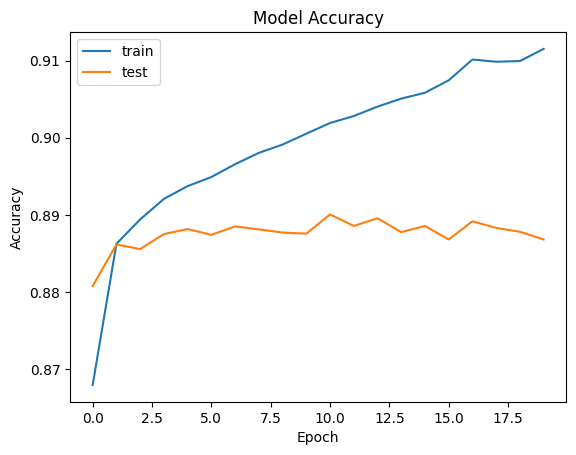

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


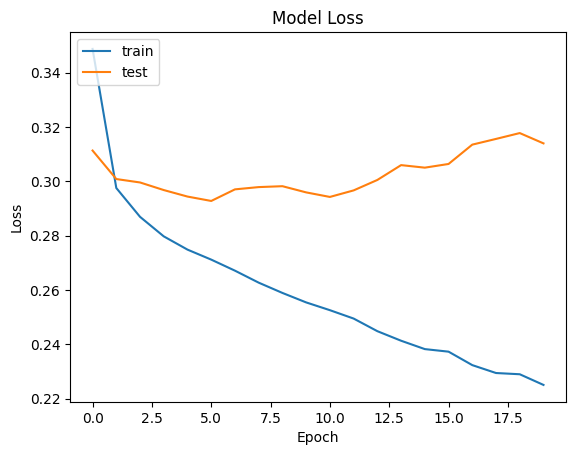

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.utils.data_utils import pad_sequences

# df = pd.read_csv("process_twitter_data.csv")

# Stop-words'leri yükleyin
stop_words = set(stopwords.words('turkish'))

# Her metni tokenize edin ve stop-words'leri çıkarın
tokenized_texts = []
for text in text_data.values.astype('U'):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token not in stop_words]
    tokenized_texts.append(filtered_tokens)

# Sözlük oluşturun ve her kelimeyi indekse dönüştürün
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(tokenized_texts)
word_index = tokenizer.word_index

# Her metni sayısal vektöre dönüştürün ve sabit bir uzunluğa ayarlayın
MAX_SEQUENCE_LENGTH = 10
sequences = tokenizer.texts_to_sequences(tokenized_texts)
padded_sequences = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

label_data["label"] = label_data.label.map({'Positive': 2, 'Negative': 0, "Notr": 1})

# Etiketleri oluşturun ve 'categorical' formata dönüştürün
labels = to_categorical(label_data["label"].values)

# Eğitim ve test verilerinizi ayırın
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D

# LSTM ağını tanımlayın
model = Sequential()
model.add(Embedding(1000, 64, input_length=10))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(64, dropout=0.2))
model.add(Dense(3, activation='softmax'))

# Ağın özetini yazdırın
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(
    X_train, 
    y_train, 
    epochs=20, 
    batch_size=32, 
    validation_data=(X_test, y_test)
)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
model.evaluate(X_test, y_test)

36/36 [==============================] - 0s 3ms/step - loss: 1.4659 - accuracy: 0.5035


[1.4658912420272827, 0.5034722089767456]

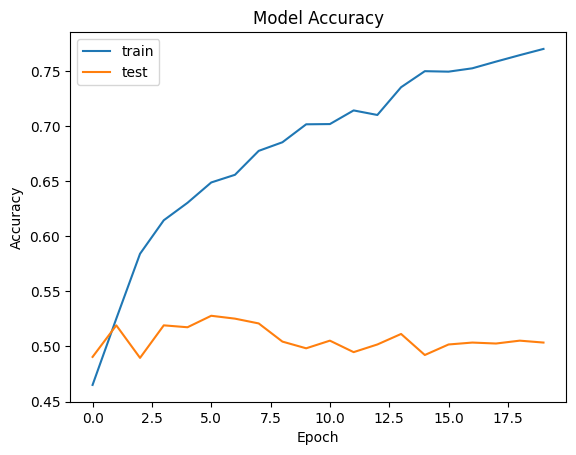

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


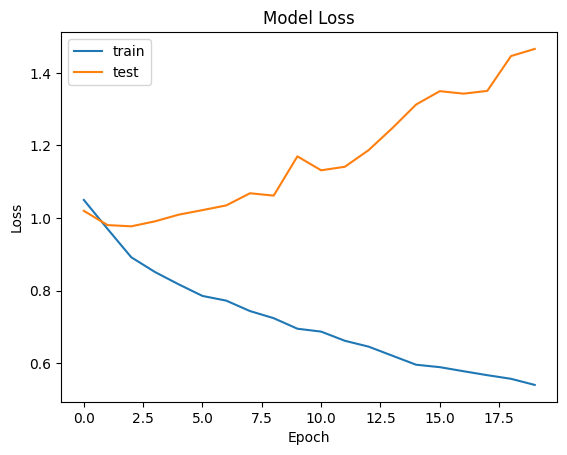

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Word2Vec + LSTM

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(text_data, label_data, test_size=0.2, random_state=42)


In [ ]:
from gensim import models

# Kelime vektörlerimizi elde etmek için Word2Vec modelimizi eğitelim
corpus = xtrain.astype("U").apply(lambda x: x.split())
w2v_model = models.Word2Vec(corpus, vector_size=100, window=5, min_count=1, workers=4)

# Kelime vektörlerimizi oluşturalım
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
word_index = tokenizer.word_index
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, 100))

for word, i in word_index.items():
    if i > num_words:
        break
    if word in w2v_model.wv.index_to_key:
        embedding_matrix[i] = w2v_model.wv[word]

In [ ]:
# Veri setimizi işleyelim

X = tokenizer.texts_to_sequences(xtrain.astype("U"))
X = pad_sequences(X, maxlen=200, padding='post')
y = to_categorical(ytrain)

X_test = tokenizer.texts_to_sequences(xtest.astype("U"))
X_test = pad_sequences(X_test, maxlen=200, padding='post')
y_test = to_categorical(ytest)

# BiLSTM ağını oluşturalım
model = Sequential()
model.add(Embedding(num_words, 100, weights=[embedding_matrix], input_length=200, trainable=False))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X, y, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
2500/2500 [==============================] - 65s 25ms/step - loss: 0.8060 - accuracy: 0.6683 - val_loss: 0.9557 - val_accuracy: 0.5365
Epoch 2/20
2500/2500 [==============================] - 43s 17ms/step - loss: 0.8220 - accuracy: 0.6296 - val_loss: 0.3726 - val_accuracy: 0.8508
Epoch 3/20
2500/2500 [==============================] - 45s 18ms/step - loss: 0.2963 - accuracy: 0.8902 - val_loss: 0.2909 - val_accuracy: 0.8943
Epoch 4/20
2500/2500 [==============================] - 43s 17ms/step - loss: 0.2511 - accuracy: 0.9051 - val_loss: 0.2582 - val_accuracy: 0.9022
Epoch 5/20
2500/2500 [==============================] - 43s 17ms/step - loss: 0.2334 - accuracy: 0.9120 - val_loss: 0.2524 - val_accuracy: 0.9069
Epoch 6/20
2500/2500 [==============================] - 44s 17ms/step - loss: 0.2212 - accuracy: 0.9159 - val_loss: 0.2468 - val_accuracy: 0.9079
Epoch 7/20
2500/2500 [==============================] - 45s 18ms/step - loss: 0.2098 - accuracy: 0.9199 - val_loss: 0.2440 -

In [ ]:
test_X = tokenizer.texts_to_sequences(xtest.astype("U"))
test_X = pad_sequences(test_X, maxlen=200, padding='post')
test_y = to_categorical(ytest)

loss, accuracy = model.evaluate(test_X, test_y)
print('Test accuracy:', accuracy)

625/625 [==============================] - 8s 13ms/step - loss: 0.3274 - accuracy: 0.9000
Test accuracy: 0.8999999761581421


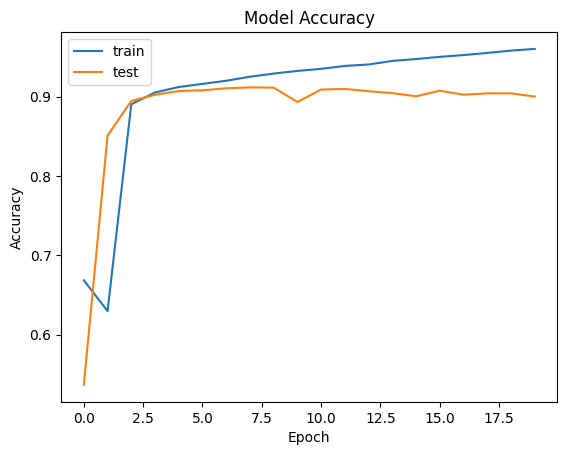

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


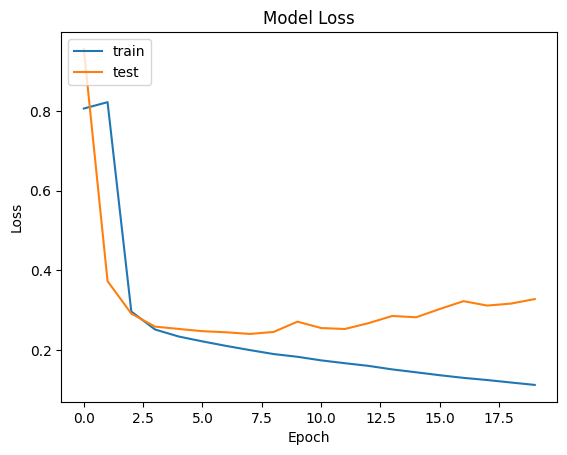

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## GloVe + LSTM

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

# Tokenizer'ı ve GloVe vektörlerini yükleme
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(xtrain.astype("U"))
word_index = tokenizer.word_index

embeddings_index = {}
with open('glove.6B.100d.txt', encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

embedding_matrix = np.zeros((len(word_index) + 1, 100))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Veri setlerini dönüştürme
train_X = tokenizer.texts_to_sequences(xtrain.astype("U"))
train_X = pad_sequences(train_X, maxlen=200, padding='post')
train_y = ytrain.values
train_y = np.asarray(pd.get_dummies(train_y), dtype=np.float32)

test_X = tokenizer.texts_to_sequences(xtest.astype("U"))
test_X = pad_sequences(test_X, maxlen=200, padding='post')
test_y = ytest.values
test_y = np.asarray(pd.get_dummies(test_y), dtype=np.float32)

# Modeli tanımlama
input_layer = Input(shape=(200,))
embedding_layer = Embedding(len(word_index) + 1,
                            100,
                            weights=[embedding_matrix],
                            input_length=200,
                            trainable=False)(input_layer)

lstm_layer = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(512, activation='relu')(lstm_layer)
dropout_layer = Dropout(0.5)(dense_layer_1)
dense_layer_2 = Dense(3, activation='softmax')(dropout_layer)

model = Model(inputs=input_layer, outputs=dense_layer_2)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Modeli eğitme
history = model.fit(train_X, train_y, batch_size=64, epochs=20, validation_data=(test_X, test_y))

# Modeli test etme
loss, accuracy = model.evaluate(test_X, test_y)
print('Test accuracy:', accuracy)


Epoch 1/20
1250/1250 [==============================] - 19s 14ms/step - loss: 0.9538 - accuracy: 0.5353 - val_loss: 0.9515 - val_accuracy: 0.5365
Epoch 2/20
1250/1250 [==============================] - 16s 13ms/step - loss: 0.9542 - accuracy: 0.5352 - val_loss: 0.9512 - val_accuracy: 0.5365
Epoch 3/20
1250/1250 [==============================] - 15s 12ms/step - loss: 0.9497 - accuracy: 0.5361 - val_loss: 0.9509 - val_accuracy: 0.5368
Epoch 4/20
1250/1250 [==============================] - 16s 13ms/step - loss: 0.9512 - accuracy: 0.5354 - val_loss: 0.9504 - val_accuracy: 0.5367
Epoch 5/20
1250/1250 [==============================] - 15s 12ms/step - loss: 0.7616 - accuracy: 0.6542 - val_loss: 0.5801 - val_accuracy: 0.7687
Epoch 6/20
1250/1250 [==============================] - 15s 12ms/step - loss: 0.5379 - accuracy: 0.7791 - val_loss: 0.4942 - val_accuracy: 0.7967
Epoch 7/20
1250/1250 [==============================] - 16s 13ms/step - loss: 0.4800 - accuracy: 0.8006 - val_loss: 0.4991 -

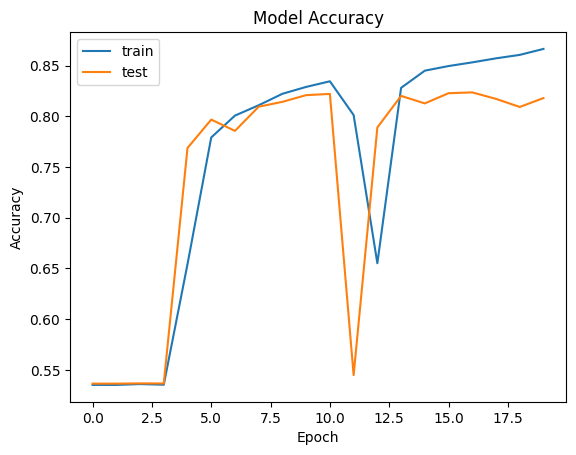

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


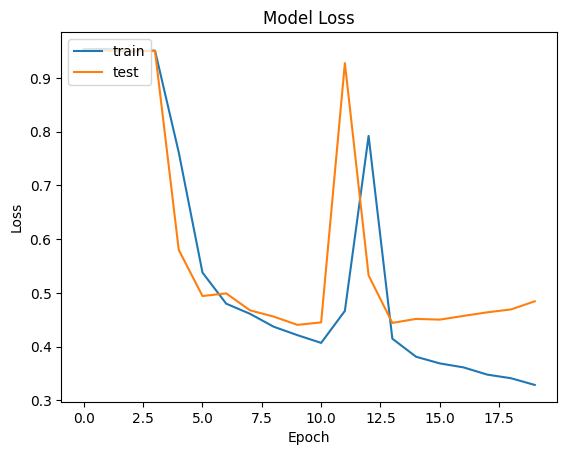

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Bi-LSTM

In [8]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SpatialDropout1D, Bidirectional, LSTM, Dropout, Conv1D,GlobalMaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# df = pd.read_csv("process_twitter_data.csv")

# Metin verilerini Tokenize etme
max_features = 2000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(text_data.values.astype('U'))
X = tokenizer.texts_to_sequences(text_data.values.astype('U'))
X = pad_sequences(X)

# Etiketleri One-hot encoding yapma
y = pd.get_dummies(label_data).values

# id  Olumlu Olumsuz Nötr
# 1   0      0       1
# 2   0      1       0
# 3   1      0       0

# Verileri eğitim ve test setleri olarak bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bilstm ağı oluşturma


In [ ]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(max_features, embedding_vector_length, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))

# 25 katmanlı BiLSTM ağı
for _ in range(4):
    model.add(Bidirectional(LSTM(200, return_sequences=True)))
    model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(200)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))


# Modeli derleme
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

# Modeli eğitme
history = model.fit(
    X_train, 
    y_train, 
    validation_data=(X_test, y_test), 
    epochs=10, 
    batch_size=64
)

# Test seti üzerinde model performansını değerlendirme
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
model.save("model_sentiment2.h5")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1265, 32)          64000     
                                                                 
 spatial_dropout1d (SpatialD  (None, 1265, 32)         0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 1265, 400)        372800    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 1265, 400)         0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 1265, 400)        961600    
 nal)                                                            
                                                        

In [12]:
from keras.models import load_model

model = load_model('model_sentiment.h5', compile=False)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

content = "Pov: ailenle misafirliğe gittiğinde uyuya kaldın baban seni sırtında eve getiriyor"

max_length = 1781  # Eğitimde belirlediğiniz maksimum metin uzunluğunu kullanın
tokenizer = Tokenizer(num_words=max_length, split=' ')  # Eğitimde kullandığınız tokenizer'ı yükleyin veya oluşturun
text_sequence = tokenizer.texts_to_sequences([content])
text_sequence = pad_sequences(text_sequence, maxlen=max_length)
predictions = model.predict(text_sequence)
print(predictions)
label_mapping = {'Positive': 2, 'Negative': 0, 'Notr': 1}
# [0.82, 0.10, 0.42]
# En yüksek olasılığa sahip sınıfın indeksini bulun
predicted_class_index = np.argmax(predictions)
print(predicted_class_index)
# Etiketlerin sırasını kullanarak tahminin hangi sınıfa ait olduğunu belirleyin
label_mapping_inverse = {v: k for k, v in label_mapping.items()}
predicted_class = label_mapping_inverse[predicted_class_index]
print(predicted_class)

1/1 [==============================] - 0s 119ms/step
[[0.09710419 0.658109   0.2447868 ]]
1
Notr


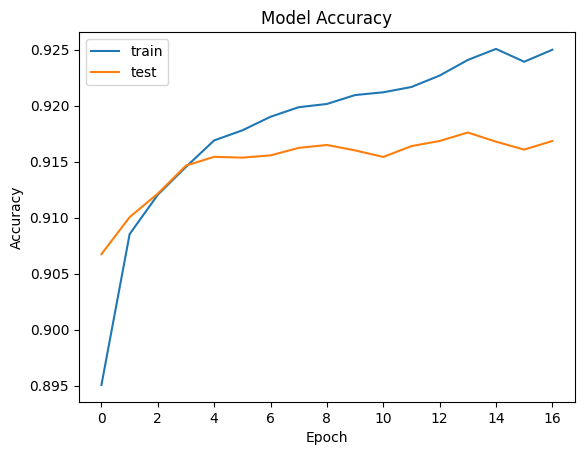

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


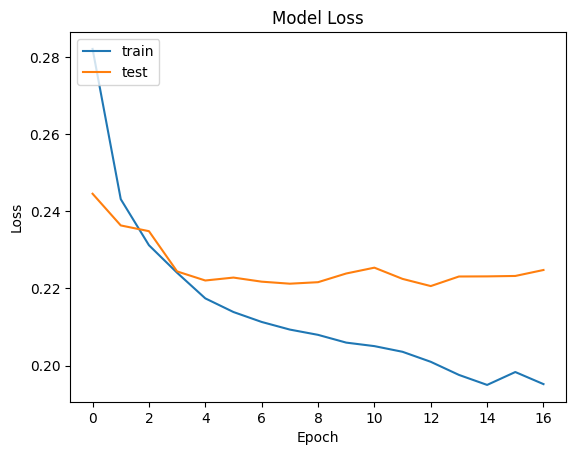

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

####ikinci

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SpatialDropout1D, Bidirectional, LSTM, Dropout, Conv1D,GlobalMaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv("process_twitter_data.csv")

# Metin verilerini Tokenize etme
max_features = 2000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(text_data.values.astype('U'))
X = tokenizer.texts_to_sequences(text_data.values.astype('U'))
X = pad_sequences(X)

# Etiketleri One-hot encoding yapma
y = pd.get_dummies(label_data).values

# id  Olumlu Olumsuz Nötr
# 1   0      0       1
# 2   0      1       0
# 3   1      0       0

# Verileri eğitim ve test setleri olarak bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bilstm ağı oluşturma
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(max_features, embedding_vector_length, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'),)
model.add(Dense(3, activation='softmax'))

# Modeli derleme
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

# Modeli eğitme
history = model.fit(
    X_train, 
    y_train, 
    validation_data=(X_test, y_test), 
    epochs=20, 
    batch_size=64
)

# Test seti üzerinde model performansını değerlendirme
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 1099, 32)          64000     
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 1099, 32)         0         
 lDropout1D)                                                     
                                                                 
 bidirectional (Bidirectiona  (None, 200)              106400    
 l)                                                              
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 dense_6 (Dense)             (None, 16)                3216      
                                                                 
 dense_7 (Dense)             (None, 3)                

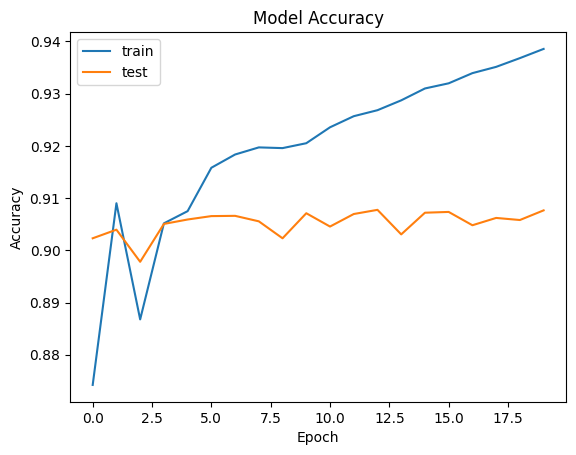

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


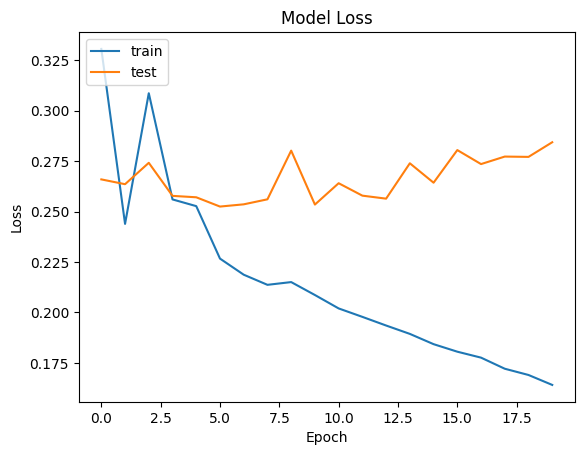

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Word2Vec + Bi-LSTM

In [ ]:
from sklearn.model_selection import train_test_split
label_data = label_data.map({'Positive': 2, 'Negative': 0, "Notr": 1})

xtrain, xtest, ytrain, ytest = train_test_split(text_data, label_data, test_size=0.2, random_state=42)

In [ ]:
from gensim import models

# Kelime vektörlerimizi elde etmek için Word2Vec modelimizi eğitelim
corpus = xtrain.astype("U").apply(lambda x: x.split())
w2v_model = models.Word2Vec(corpus, vector_size=100, window=5, min_count=1, workers=4)

# Kelime vektörlerimizi oluşturalım
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
word_index = tokenizer.word_index
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, 100))

for word, i in word_index.items():
    if i > num_words:
        break
    if word in w2v_model.wv.index_to_key:
        embedding_matrix[i] = w2v_model.wv[word]

In [ ]:
# Veri setimizi işleyelim
from keras.utils import to_categorical

X = tokenizer.texts_to_sequences(xtrain.astype("U"))
X = pad_sequences(X, maxlen=200, padding='post')
y = to_categorical(ytrain)

X_test = tokenizer.texts_to_sequences(xtest.astype("U"))
X_test = pad_sequences(X_test, maxlen=200, padding='post')
y_test = to_categorical(ytest)

# BiLSTM ağını oluşturalım
model = Sequential()
model.add(Embedding(num_words, 100, weights=[embedding_matrix], input_length=200, trainable=False))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X, y, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
2500/2500 [==============================] - 81s 28ms/step - loss: 0.2872 - accuracy: 0.8909 - val_loss: 0.2673 - val_accuracy: 0.8985
Epoch 2/20
2500/2500 [==============================] - 73s 29ms/step - loss: 0.2418 - accuracy: 0.9085 - val_loss: 0.2491 - val_accuracy: 0.9075
Epoch 3/20
2500/2500 [==============================] - 68s 27ms/step - loss: 0.2226 - accuracy: 0.9148 - val_loss: 0.2412 - val_accuracy: 0.9099
Epoch 4/20
2500/2500 [==============================] - 73s 29ms/step - loss: 0.2057 - accuracy: 0.9207 - val_loss: 0.2371 - val_accuracy: 0.9104
Epoch 5/20
2500/2500 [==============================] - 71s 28ms/step - loss: 0.1904 - accuracy: 0.9268 - val_loss: 0.2346 - val_accuracy: 0.9130
Epoch 6/20
2500/2500 [==============================] - 72s 29ms/step - loss: 0.1756 - accuracy: 0.9318 - val_loss: 0.2466 - val_accuracy: 0.9096
Epoch 7/20
2500/2500 [==============================] - 72s 29ms/step - loss: 0.1600 - accuracy: 0.9386 - val_loss: 0.2433 -

In [ ]:
test_X = tokenizer.texts_to_sequences(xtest.astype("U"))
test_X = pad_sequences(test_X, maxlen=200, padding='post')
test_y = to_categorical(ytest)

loss, accuracy = model.evaluate(test_X, test_y)
print('Test accuracy:', accuracy)

625/625 [==============================] - 12s 18ms/step - loss: 0.5363 - accuracy: 0.9025
Test accuracy: 0.9024999737739563


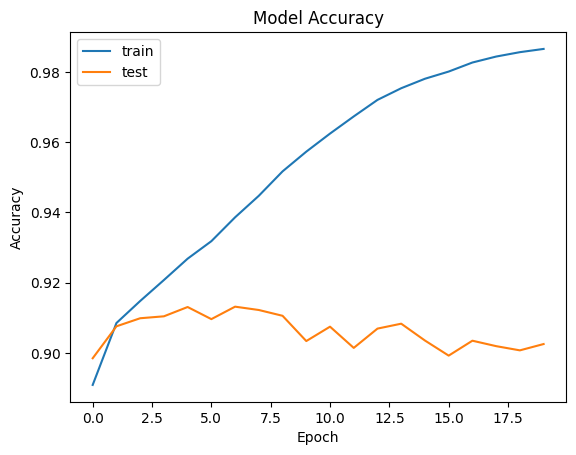

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


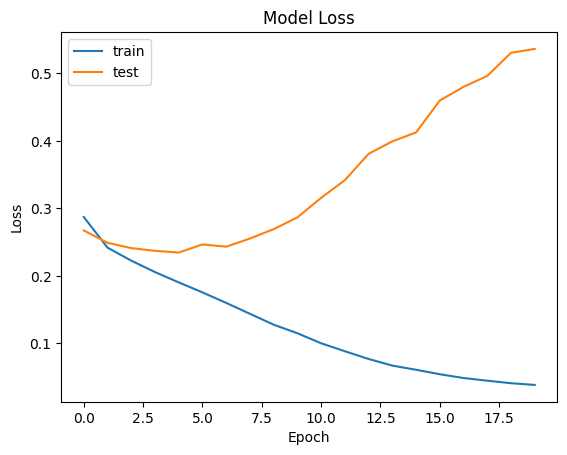

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## GloVe + Bi-LSTM

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

# Tokenizer'ı ve GloVe vektörlerini yükleme
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(xtrain.astype("U"))
word_index = tokenizer.word_index

embeddings_index = {}
with open('glove.6B.100d.txt', encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

embedding_matrix = np.zeros((len(word_index) + 1, 100))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Veri setlerini dönüştürme
train_X = tokenizer.texts_to_sequences(xtrain.astype("U"))
train_X = pad_sequences(train_X, maxlen=200, padding='post')
train_y = ytrain.values
train_y = np.asarray(pd.get_dummies(train_y), dtype=np.float32)

test_X = tokenizer.texts_to_sequences(xtest.astype("U"))
test_X = pad_sequences(test_X, maxlen=200, padding='post')
test_y = ytest.values
test_y = np.asarray(pd.get_dummies(test_y), dtype=np.float32)

# Modeli tanımlama
input_layer = Input(shape=(200,))
embedding_layer = Embedding(len(word_index) + 1,
                            100,
                            weights=[embedding_matrix],
                            input_length=200,
                            trainable=False)(input_layer)

lstm_layer = Bidirectional(LSTM(128))(embedding_layer)
dense_layer_1 = Dense(512, activation='relu')(lstm_layer)
dropout_layer = Dropout(0.5)(dense_layer_1)
dense_layer_2 = Dense(3, activation='softmax')(dropout_layer)

model = Model(inputs=input_layer, outputs=dense_layer_2)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Modeli eğitme
history = model.fit(train_X, train_y, batch_size=64, epochs=20, validation_data=(test_X, test_y),
                    )

# Modeli test etme
loss, accuracy = model.evaluate(test_X, test_y)
print('Test accuracy:', accuracy)


Epoch 1/20
1250/1250 [==============================] - 34s 23ms/step - loss: 0.5390 - accuracy: 0.7721 - val_loss: 0.4863 - val_accuracy: 0.7991
Epoch 2/20
1250/1250 [==============================] - 27s 22ms/step - loss: 0.4632 - accuracy: 0.8101 - val_loss: 0.4607 - val_accuracy: 0.8130
Epoch 3/20
1250/1250 [==============================] - 28s 22ms/step - loss: 0.4357 - accuracy: 0.8203 - val_loss: 0.4452 - val_accuracy: 0.8181
Epoch 4/20
1250/1250 [==============================] - 26s 21ms/step - loss: 0.4160 - accuracy: 0.8298 - val_loss: 0.4341 - val_accuracy: 0.8245
Epoch 5/20
1250/1250 [==============================] - 29s 23ms/step - loss: 0.3989 - accuracy: 0.8368 - val_loss: 0.4378 - val_accuracy: 0.8242
Epoch 6/20
1250/1250 [==============================] - 26s 21ms/step - loss: 0.3815 - accuracy: 0.8420 - val_loss: 0.4392 - val_accuracy: 0.8256
Epoch 7/20
1250/1250 [==============================] - 26s 21ms/step - loss: 0.4008 - accuracy: 0.8381 - val_loss: 0.4383 -

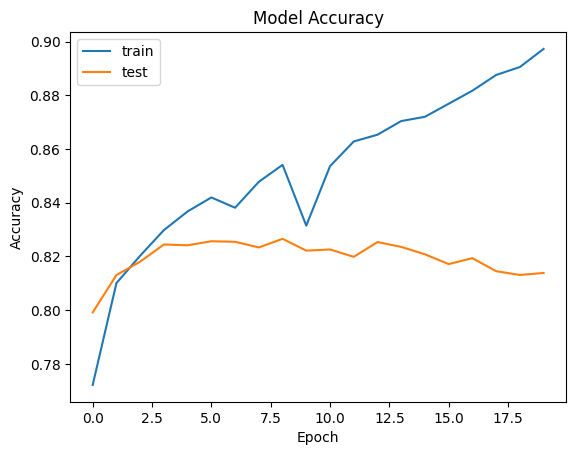

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


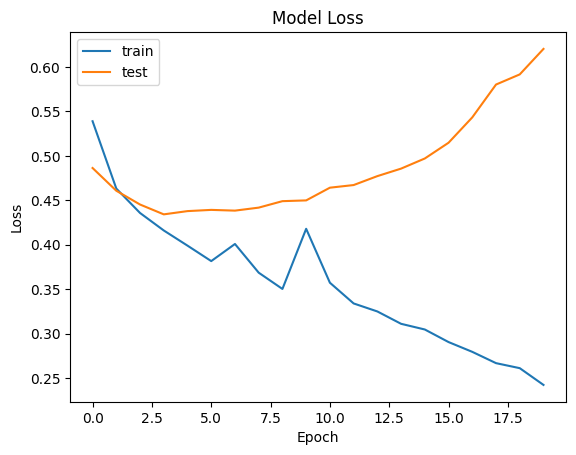

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##BERTurk (Bidirectional Encoder Representations from Transformers)

In [ ]:
!pip install transformers pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 64.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 90.4 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
label_data = label_data.map({'Positive': 2, 'Negative': 0, "Notr": 1})

xtrain, xtest, ytrain, ytest = train_test_split(text_data, label_data, test_size=0.2, random_state=42)

In [ ]:
data = xtrain.astype("U").values
labels = ytrain.values

In [ ]:
from transformers import AutoTokenizer
#Load BERT Turkish tokenizer
tokenizer = AutoTokenizer.from_pretrained("dbmdz/bert-base-turkish-cased",do_lower_case=True, add_prefix_space=True, use_fast=False)

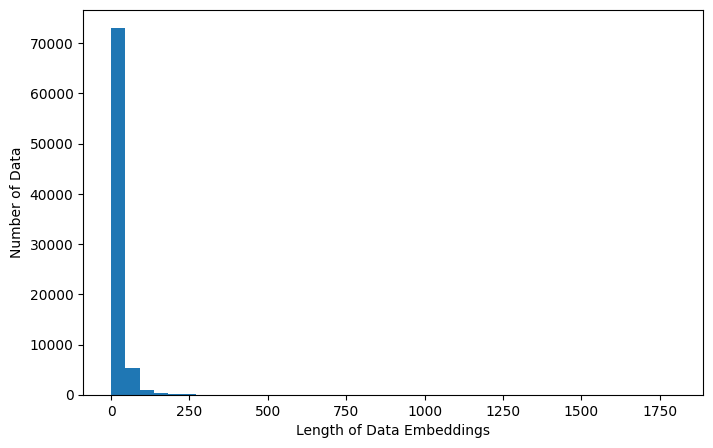

In [ ]:
import matplotlib.pyplot as plt
def plot_sentence_embeddings_length(text_list, tokenizer):
    tokenized_texts = list(map(lambda t: tokenizer.tokenize(t), text_list))
    tokenized_texts_len = list(map(lambda t: len(t), tokenized_texts))
    fig, ax = plt.subplots(figsize=(8, 5));
    ax.hist(tokenized_texts_len, bins=40);
    ax.set_xlabel("Length of Data Embeddings");
    ax.set_ylabel("Number of Data");
    return
plot_sentence_embeddings_length(data, tokenizer)

In [ ]:
indices=tokenizer.batch_encode_plus(data,max_length=128,add_special_tokens=True, return_attention_mask=True,pad_to_max_length=True,truncation=True, padding=True)
input_ids=indices["input_ids"]
attention_masks=indices["attention_mask"]
print(input_ids[0])
print(data[0])

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2387: UserWarning: Though `pad_to_max_length` = `True`, it is ignored because `padding`=`True`.
  warnings.warn("Though `pad_to_max_length` = `True`, it is ignored because `padding`=`True`.")


[2, 16619, 2011, 12357, 2323, 11182, 2006, 15007, 2116, 4768, 2407, 21372, 17792, 25881, 1025, 19123, 4766, 21812, 2879, 1025, 83, 16084, 2248, 17792, 25881, 1025, 2578, 3468, 17094, 1031, 2586, 3238, 5399, 8008, 4146, 16807, 1987, 11908, 2029, 16807, 3221, 8935, 1009, 23526, 1024, 16807, 1987, 23526, 1024, 2939, 1025, 2103, 2131, 1032, 2287, 7829, 3361, 1022, 4154, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sipariş gün el ulaş çalış sıkıntı yok önce süpürge başka marka sulu mode o kıyasla zaman süpürge fazla em güç sahip ses hafif pratik ayrıca ürün almanya üretim kutun üzeri ürün üzeri made germany yaz kalite anlaş zaten


In [ ]:
from sklearn.model_selection import train_test_split

# Use 99% for training and 1% for validation.
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, 
                                                            random_state=42, test_size=0.2)
# Do the same for the masks.
train_masks, validation_masks, _, _ = train_test_split(attention_masks, labels,
                                             random_state=42, test_size=0.2)

In [ ]:
import torch
if torch.cuda.is_available():  
    device = torch.device("cuda")
    print('We will use the GPU:', torch.cuda.get_device_name(0))
    
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

We will use the GPU: Tesla T4


In [ ]:
# Convert all of our data into torch tensors, the required datatype for our model
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels, dtype=torch.long)
validation_labels = torch.tensor(validation_labels, dtype=torch.long)
train_masks = torch.tensor(train_masks, dtype=torch.long)
validation_masks = torch.tensor(validation_masks, dtype=torch.long)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 16

# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set.
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [ ]:
from transformers import AutoModelForSequenceClassification, AdamW, AutoConfig
config = AutoConfig.from_pretrained(
        "dbmdz/bert-base-turkish-cased",num_labels=3)
# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = AutoModelForSequenceClassification.from_pretrained(
    "dbmdz/bert-base-turkish-cased",config=config)

model.cuda()

Some weights of the model checkpoint at dbmdz/bert-base-turkish-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were 

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(32000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5
                  betas=[0.9,0.999],
                  eps = 1e-6 # args.adam_epsilon  - default is 1e-8.
                )
from transformers import get_linear_schedule_with_warmup

# Number of training epochs (authors recommend between 2 and 4)
epochs = 50

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import random

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []
accuracies = []
l2_regularization_coefficient = 0.01
epochs = 1

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 30 batches.
        if step % 32 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        
        # The call to `model` always returns a tuple, so we need to pull the 
        # loss value out of the tuple.
        loss = outputs[0]

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.

        l2_regularization_term = torch.tensor(0., device=device)
        for param in model.parameters():
            l2_regularization_term += torch.norm(param)
        loss += l2_regularization_coefficient * l2_regularization_term

        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.6f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(format_time(time.time() - t0)))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        
        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have
            # not provided labels.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        logits = outputs[0]

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        
        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy

        # Track the number of batches
        nb_eval_steps += 1
    accuracy = eval_accuracy/nb_eval_steps
    accuracies.append(accuracy)
    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.6f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")
torch.save(model.state_dict(), 'berturk_model_bitirme.pth')


======== Epoch 1 / 1 ========
Training...
  Batch    32  of  4,000.    Elapsed: 0:00:13.
  Batch    64  of  4,000.    Elapsed: 0:00:26.
  Batch    96  of  4,000.    Elapsed: 0:00:39.
  Batch   128  of  4,000.    Elapsed: 0:00:50.
  Batch   160  of  4,000.    Elapsed: 0:01:02.
  Batch   192  of  4,000.    Elapsed: 0:01:14.
  Batch   224  of  4,000.    Elapsed: 0:01:25.
  Batch   256  of  4,000.    Elapsed: 0:01:37.
  Batch   288  of  4,000.    Elapsed: 0:01:49.
  Batch   320  of  4,000.    Elapsed: 0:02:01.
  Batch   352  of  4,000.    Elapsed: 0:02:12.
  Batch   384  of  4,000.    Elapsed: 0:02:24.
  Batch   416  of  4,000.    Elapsed: 0:02:36.
  Batch   448  of  4,000.    Elapsed: 0:02:48.
  Batch   480  of  4,000.    Elapsed: 0:02:59.
  Batch   512  of  4,000.    Elapsed: 0:03:11.
  Batch   544  of  4,000.    Elapsed: 0:03:23.
  Batch   576  of  4,000.    Elapsed: 0:03:35.
  Batch   608  of  4,000.    Elapsed: 0:03:46.
  Batch   640  of  4,000.    Elapsed: 0:03:58.
  Batch   672  of

In [ ]:
# Create sentence and label lists for test data
data = df.preprocessed_data.values
labels1 = df.Label.values

indices1=tokenizer.batch_encode_plus(data,max_length=128,add_special_tokens=True, return_attention_mask=True,pad_to_max_length=True,truncation=True)
input_ids1=indices1["input_ids"]
attention_masks1=indices1["attention_mask"]

prediction_inputs1= torch.tensor(input_ids1)
prediction_masks1 = torch.tensor(attention_masks1)
prediction_labels1 = torch.tensor(labels1)

# Set the batch size.  
batch_size = 32 

# Create the DataLoader.
prediction_data1 = TensorDataset(prediction_inputs1, prediction_masks1, prediction_labels1)
prediction_sampler1 = SequentialSampler(prediction_data1)
prediction_dataloader1 = DataLoader(prediction_data1, sampler=prediction_sampler1, batch_size=batch_size)

NameError: ignored

In [ ]:
# Doğruluk ve kayıp grafiğini çizin
plt.figure(figsize=(8, 4))
plt.plot(loss_values, label='Train')
plt.title('Loss')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(accuracies, label='Train')
plt.title('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(prediction_inputs1)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader1:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids1, b_input_mask1, b_labels1 = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs1 = model(b_input_ids1, token_type_ids=None, 
                      attention_mask=b_input_mask1)

  logits1 = outputs1[0]

  # Move logits and labels to CPU
  logits1 = logits1.detach().cpu().numpy()
  label_ids1 = b_labels1.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits1)
  true_labels.append(label_ids1)

print('    DONE.')

In [ ]:
# Combine the predictions for each batch into a single list of 0s and 1s.
flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()
# Combine the correct labels for each batch into a single list.
flat_true_labels = [item for sublist in true_labels for item in sublist]

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy of BERT is:",accuracy_score(flat_true_labels, flat_predictions))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(flat_true_labels, flat_predictions))

###2.


In [ ]:
import random

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


# Set the seed value all over the place to make this reproducible.
seed_val = 42
epochs = 20
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []
accuracies = []
l2_regularization_coefficient = 0.001

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 30 batches.
        if step % 32 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        
        # The call to `model` always returns a tuple, so we need to pull the 
        # loss value out of the tuple.
        loss = outputs[0]

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.

        l2_regularization_term = torch.tensor(0., device=device)
        for param in model.parameters():
            l2_regularization_term += torch.norm(param)
        loss += l2_regularization_coefficient * l2_regularization_term

        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.6f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(format_time(time.time() - t0)))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        
        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have
            # not provided labels.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        logits = outputs[0]

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        
        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy

        # Track the number of batches
        nb_eval_steps += 1
    accuracy = eval_accuracy/nb_eval_steps
    accuracies.append(accuracy)
    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.6f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")

In [ ]:
# Create sentence and label lists for test data
data = df.preprocessed_data.values
labels1 = df.Label.values

indices1=tokenizer.batch_encode_plus(data,max_length=128,add_special_tokens=True, return_attention_mask=True,pad_to_max_length=True,truncation=True)
input_ids1=indices1["input_ids"]
attention_masks1=indices1["attention_mask"]

prediction_inputs1= torch.tensor(input_ids1)
prediction_masks1 = torch.tensor(attention_masks1)
prediction_labels1 = torch.tensor(labels1)

# Set the batch size.  
batch_size = 32 

# Create the DataLoader.
prediction_data1 = TensorDataset(prediction_inputs1, prediction_masks1, prediction_labels1)
prediction_sampler1 = SequentialSampler(prediction_data1)
prediction_dataloader1 = DataLoader(prediction_data1, sampler=prediction_sampler1, batch_size=batch_size)

In [ ]:
# Doğruluk ve kayıp grafiğini çizin
plt.figure(figsize=(8, 4))
plt.plot(loss_values, label='Train')
plt.title('Loss')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(accuracies, label='Train')
plt.title('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(prediction_inputs1)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader1:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids1, b_input_mask1, b_labels1 = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs1 = model(b_input_ids1, token_type_ids=None, 
                      attention_mask=b_input_mask1)

  logits1 = outputs1[0]

  # Move logits and labels to CPU
  logits1 = logits1.detach().cpu().numpy()
  label_ids1 = b_labels1.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits1)
  true_labels.append(label_ids1)

print('    DONE.')

In [ ]:
# Combine the predictions for each batch into a single list of 0s and 1s.
flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()
# Combine the correct labels for each batch into a single list.
flat_true_labels = [item for sublist in true_labels for item in sublist]

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy of BERT is:",accuracy_score(flat_true_labels, flat_predictions))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(flat_true_labels, flat_predictions))

## Predict

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('bilstmsentimentanalysismodel.h5')

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentence = "lutfen biri bana yorumumun neresinin uygun olmadıgını soyleyebilir hepsiburada neden olumsuz degerlendirmeleri kabul etmiyorsun"

max_features = 2000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(sentence)
X = tokenizer.texts_to_sequences(sentence)
X = pad_sequences(X)

In [ ]:
tokenizer = Tokenizer(num_words=max_features, split=' ')  # Eğitimde kullandığınız tokenizer'ı yükleyin veya oluşturun
max_length = 2000  # Eğitimde belirlediğiniz maksimum metin uzunluğunu kullanın
text_sequence = tokenizer.texts_to_sequences([sentence])
text_sequence = pad_sequences(text_sequence, maxlen=max_length)

In [ ]:
pr = model.predict(text_sequence)

1/1 [==============================] - 1s 1s/step


In [ ]:
pr

array([[0.18851772, 0.5254451 , 0.28603724]], dtype=float32)

In [ ]:
label_mapping = {'Positive': 2, 'Negative': 0, 'Notr': 1}

predictions = [0.1, 0.7, 0.2]  # Örnek tahmin sonuçları

# En yüksek olasılığa sahip sınıfın indeksini bulun
predicted_class_index = predictions.index(max(predictions))
print(predicted_class_index)
# Etiketlerin sırasını kullanarak tahminin hangi sınıfa ait olduğunu belirleyin
label_mapping_inverse = {v: k for k, v in label_mapping.items()}
predicted_class = label_mapping_inverse[predicted_class_index]

print("Tahmin: ", predicted_class)

1
Tahmin:  Notr
